In [110]:
import pandas as pd
import numpy as np

In [111]:
pellet_raw = pd.read_csv('180911_SedPellet_Results.csv')

In [112]:
pellet_raw

,,Label,Area,IntDen,RawIntDen
0,1,180911_sedimentation_GABFAB-700.tif:0265-0701,0.082,42.943,149722
1,2,180911_sedimentation_GABFAB-700.tif:0249-0703,0.082,34.627,120731
2,3,180911_sedimentation_GABFAB-700.tif:0263-0733,0.082,45.165,157472
3,4,180911_sedimentation_GABFAB-700.tif:0250-0734,0.082,33.766,117728
4,5,180911_sedimentation_GABFAB-700.tif:0262-0768,0.082,65.314,227721
5,6,180911_sedimentation_GABFAB-700.tif:0245-0768,0.082,34.434,120056
6,7,180911_sedimentation_GABFAB-700.tif:0261-0803,0.082,50.445,175880
7,8,180911_sedimentation_GABFAB-700.tif:0242-0803,0.082,34.118,118954
8,9,180911_sedimentation_GABFAB-700.tif:0261-0838,0.082,52.185,181946
9,10,180911_sedimentation_GABFAB-700.tif:0247-0838,0.082,33.440,116590


In [113]:
exp = pd.Series(["GF", "GF", "GF + A", "GF + A", "GF + A + Fas", "GF + A + Fas", "GF + A + Fim", "GF + A + Fim"])

In [114]:
len(exp)

8

In [115]:
exp_data = pd.DataFrame()
exp_data['Experiment'] = exp
exp_data['GF_Fluor'] = list(pellet_raw.iloc[0:16:2]['IntDen'])
exp_data['GF_Bg'] = list(pellet_raw.iloc[1:17:2]['IntDen'])
exp_data['Actin_Fluor'] = list(pellet_raw.iloc[16:31:2]['IntDen'])
exp_data['Actin_Bg'] = list(pellet_raw.iloc[17:32:2]['IntDen'])

In [116]:
exp_data

,Experiment,GF_Fluor,GF_Bg,Actin_Fluor,Actin_Bg
0,GF,42.943,34.627,94.909,87.861
1,GF,45.165,33.766,93.157,85.632
2,GF + A,65.314,34.434,1650.851,83.148
3,GF + A,50.445,34.118,1644.376,95.083
4,GF + A + Fas,52.185,33.440,1672.998,91.772
5,GF + A + Fas,50.171,33.413,1600.510,89.702
6,GF + A + Fim,49.237,39.085,1417.798,87.504
7,GF + A + Fim,50.204,36.145,1635.050,86.942


In [117]:
exp_data['GF_diff'] = exp_data['GF_Fluor'] - exp_data['GF_Bg']
exp_data['Actin_diff'] = exp_data['Actin_Fluor'] - exp_data['Actin_Bg']

In [118]:
exp_data

,Experiment,GF_Fluor,GF_Bg,Actin_Fluor,Actin_Bg,GF_diff,Actin_diff
0,GF,42.943,34.627,94.909,87.861,8.316,7.048
1,GF,45.165,33.766,93.157,85.632,11.399,7.525
2,GF + A,65.314,34.434,1650.851,83.148,30.880,1567.703
3,GF + A,50.445,34.118,1644.376,95.083,16.327,1549.293
4,GF + A + Fas,52.185,33.440,1672.998,91.772,18.745,1581.226
5,GF + A + Fas,50.171,33.413,1600.510,89.702,16.758,1510.808
6,GF + A + Fim,49.237,39.085,1417.798,87.504,10.152,1330.294
7,GF + A + Fim,50.204,36.145,1635.050,86.942,14.059,1548.108


In [119]:
exp_data['fold_actin'] = exp_data['Actin_diff'] / exp_data['Actin_diff'].iloc[2:8].min()
exp_data.loc[0:1, 'fold_actin'] = 1

In [120]:
exp_data['adjusted_GF'] = exp_data['GF_diff'] / exp_data['fold_actin']

In [121]:
exp_data

,Experiment,GF_Fluor,GF_Bg,Actin_Fluor,Actin_Bg,GF_diff,Actin_diff,fold_actin,adjusted_GF
0,GF,42.943,34.627,94.909,87.861,8.316,7.048,1.000000,8.316000
1,GF,45.165,33.766,93.157,85.632,11.399,7.525,1.000000,11.399000
2,GF + A,65.314,34.434,1650.851,83.148,30.880,1567.703,1.178464,26.203610
3,GF + A,50.445,34.118,1644.376,95.083,16.327,1549.293,1.164625,14.019111
4,GF + A + Fas,52.185,33.440,1672.998,91.772,18.745,1581.226,1.188629,15.770270
5,GF + A + Fas,50.171,33.413,1600.510,89.702,16.758,1510.808,1.135695,14.755725
6,GF + A + Fim,49.237,39.085,1417.798,87.504,10.152,1330.294,1.000000,10.152000
7,GF + A + Fim,50.204,36.145,1635.050,86.942,14.059,1548.108,1.163734,12.080942


In [196]:
def analyze_sedimentation(experiment, f_df, col = 'IntDen', no_actin = 2):
    exp_data = pd.DataFrame()
    len_exp = len(experiment)
    exp_data['Experiment'] = experiment
    exp_data['GF_Fluor'] = list(f_df.iloc[0:(2 * len_exp):2][col])
    exp_data['GF_Bg'] = list(f_df.iloc[1:(2 * len_exp + 1):2][col])
    exp_data['Actin_Fluor'] = list(f_df.iloc[(2 * len_exp):(4 * len_exp - 1):2][col])
    exp_data['Actin_Bg'] = list(f_df.iloc[(2 * len_exp + 1):(4 * len_exp):2][col])
    exp_data['GF_diff'] = exp_data['GF_Fluor'] - exp_data['GF_Bg']
    exp_data['Actin_diff'] = exp_data['Actin_Fluor'] - exp_data['Actin_Bg']
    if no_actin > 0:
        exp_data['fold_actin'] = exp_data['Actin_diff'] / exp_data['Actin_diff'].iloc[no_actin:len(experiment)].min()
        exp_data.loc[0:(no_actin - 1), 'fold_actin'] = 1
    else:
        exp_data['fold_actin'] = exp_data['Actin_diff'] / exp_data['Actin_diff'].min()
    exp_data['adjusted_GF'] = exp_data['GF_diff'] / exp_data['fold_actin']
    return exp_data

In [123]:
pellet_180911 = analyze_sedimentation(exp, pellet_raw)

In [124]:
pellet_180911

,Experiment,GF_Fluor,GF_Bg,Actin_Fluor,Actin_Bg,GF_diff,Actin_diff,fold_actin,adjusted_GF
0,GF,42.943,34.627,94.909,87.861,8.316,7.048,1.000000,8.316000
1,GF,45.165,33.766,93.157,85.632,11.399,7.525,1.000000,11.399000
2,GF + A,65.314,34.434,1650.851,83.148,30.880,1567.703,1.178464,26.203610
3,GF + A,50.445,34.118,1644.376,95.083,16.327,1549.293,1.164625,14.019111
4,GF + A + Fas,52.185,33.440,1672.998,91.772,18.745,1581.226,1.188629,15.770270
5,GF + A + Fas,50.171,33.413,1600.510,89.702,16.758,1510.808,1.135695,14.755725
6,GF + A + Fim,49.237,39.085,1417.798,87.504,10.152,1330.294,1.000000,10.152000
7,GF + A + Fim,50.204,36.145,1635.050,86.942,14.059,1548.108,1.163734,12.080942


In [125]:
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

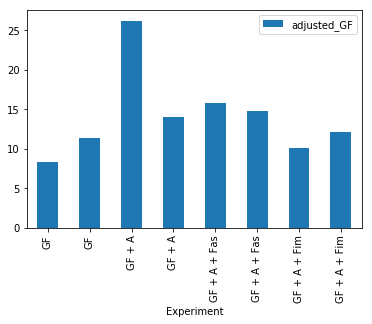

In [126]:
pellet_180911.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

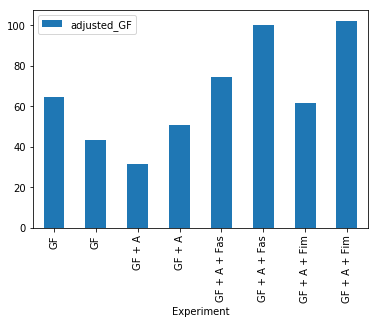

In [127]:
sup_180911 = pd.read_csv('180911_SedSup_Results.csv')
sup_180911 = analyze_sedimentation(exp, sup_180911)
sup_180911.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

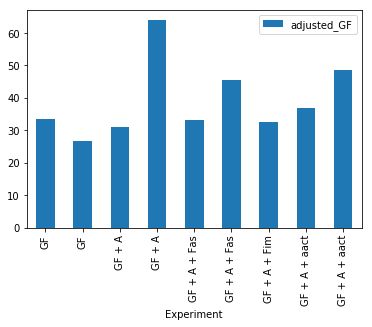

In [128]:
exp2 = pd.Series(["GF", "GF", "GF + A", "GF + A", "GF + A + Fas", "GF + A + Fas", "GF + A + Fim", "GF + A + Fim", "GF + A + aact", "GF + A + aact"])
exp3 = pd.Series(["GF", "GF", "GF + A", "GF + A", "GF + A + Fas", "GF + A + Fas", "GF + A + Fim", "GF + A + aact", "GF + A + aact"])
sup_180910 = pd.read_csv('180910_SedSup_Results.csv')
sup_180910.drop(sup_180910.index[12:14], inplace = True)
sup_180910.drop(sup_180910.index[32:34], inplace = True)
sup_180910.reset_index(inplace = True)
sup_180910 = analyze_sedimentation(exp3, sup_180910)
sup_180910.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

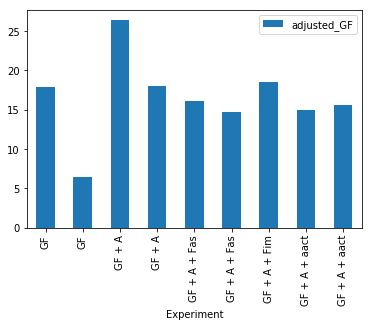

In [129]:
pellet_180910 = pd.read_csv('180910_SedPellet_Results.csv')
pellet_180910.drop(pellet_180910.index[12:14], inplace = True)
pellet_180910.drop(pellet_180910.index[32:34], inplace = True)
pellet_180910.reset_index(inplace = True)
pellet_180910 = analyze_sedimentation(exp3, pellet_180910)
pellet_180910.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

In [130]:
combined_pellet = pd.concat([pellet_180910, pellet_180911], axis = 0)
combined_sup = pd.concat([sup_180910, sup_180911], axis = 0)

In [131]:
pellet_means = combined_pellet.groupby('Experiment').agg(np.mean)
pellet_means.reset_index(inplace = True)
pellet_se = combined_pellet.groupby('Experiment').agg(stats.sem)
pellet_se.reset_index(inplace = True)

In [132]:
sup_means = combined_sup.groupby('Experiment').agg(np.mean)
sup_means.reset_index(inplace = True)
sup_se = combined_sup.groupby('Experiment').agg(stats.sem)
sup_se.reset_index(inplace = True)

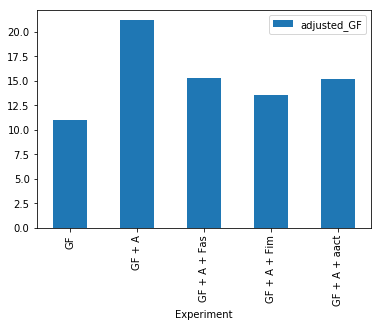

In [133]:
pellet_means.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

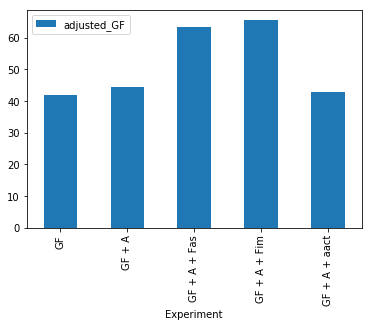

In [134]:
sup_means.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

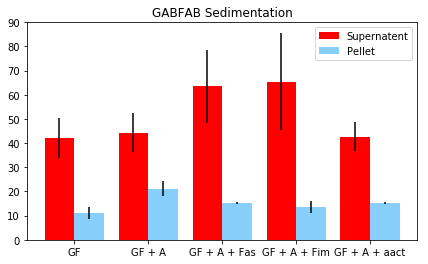

In [135]:
fig, ax = plt.subplots(figsize = (7,4))
ind = np.arange(5)
width = 0.4
p1 = ax.bar(ind, sup_means['adjusted_GF'], width, color = 'r', yerr=sup_se['adjusted_GF'])
p2 = ax.bar(ind + width, pellet_means['adjusted_GF'], width, color = 'lightskyblue', yerr = pellet_se['adjusted_GF'])
ax.set_title('GABFAB Sedimentation')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sup_means['Experiment'])
ax.legend((p1[0], p2[0]), ('Supernatent', 'Pellet'))
plt.savefig('GABFAB_SedGraph_180910_11.png')
plt.show()

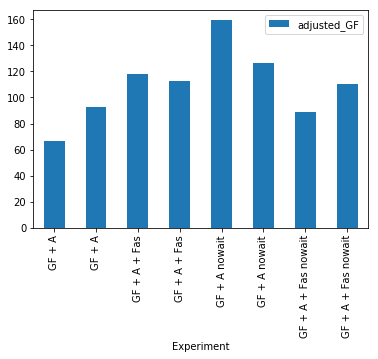

In [136]:
exp4 = pd.Series(["GF + A", "GF + A", 
                  "GF + A + Fas", "GF + A + Fas", 
                  "GF + A nowait", "GF + A nowait", 
                  "GF + A + Fas nowait", "GF + A + Fas nowait"])
sup_180913 = pd.read_csv('180913_SedSup_Results.csv')
sup_180913 = analyze_sedimentation(exp4, sup_180913, no_actin = 0)
sup_180913.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

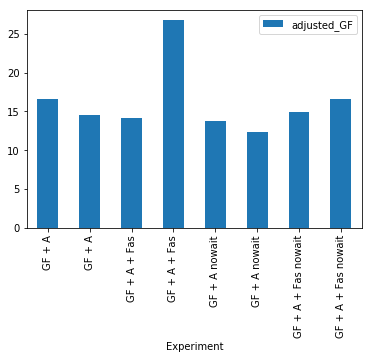

In [137]:
pellet_180913 = pd.read_csv('180913_SedPellet_Results.csv')
pellet_180913 = analyze_sedimentation(exp4, pellet_180913, no_actin = 0)
pellet_180913.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

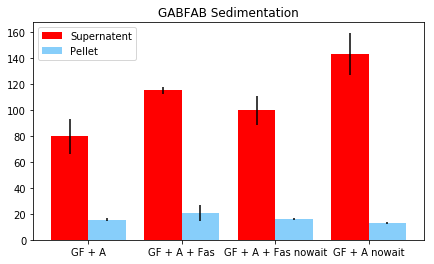

In [138]:
pellet2_means = pellet_180913.groupby('Experiment').agg(np.mean)
pellet2_means.reset_index(inplace = True)
pellet2_se = pellet_180913.groupby('Experiment').agg(stats.sem)
pellet2_se.reset_index(inplace = True)
sup2_means = sup_180913.groupby('Experiment').agg(np.mean)
sup2_means.reset_index(inplace = True)
sup2_se = sup_180913.groupby('Experiment').agg(stats.sem)
sup2_se.reset_index(inplace = True)

fig, ax = plt.subplots(figsize = (7,4))
ind = np.arange(4)
width = 0.4
p1 = ax.bar(ind, sup2_means['adjusted_GF'], width, color = 'r', yerr=sup2_se['adjusted_GF'])
p2 = ax.bar(ind + width, pellet2_means['adjusted_GF'], width, color = 'lightskyblue', yerr = pellet2_se['adjusted_GF'])
ax.set_title('GABFAB Sedimentation')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sup2_means['Experiment'])
ax.legend((p1[0], p2[0]), ('Supernatent', 'Pellet'))
plt.savefig('GABFAB_SedGraph_180913.png')
plt.show()

In [139]:
sup_180913

,Experiment,GF_Fluor,GF_Bg,Actin_Fluor,Actin_Bg,GF_diff,Actin_diff,fold_actin,adjusted_GF
0,GF + A,173.836,87.827,76.389,45.299,86.009,31.090,1.297200,66.303561
1,GF + A,233.770,88.904,82.956,45.536,144.866,37.420,1.561313,92.784699
2,GF + A + Fas,261.395,89.545,82.200,47.216,171.850,34.984,1.459674,117.731790
3,GF + A + Fas,260.553,82.332,86.918,48.889,178.221,38.029,1.586723,112.320143
4,GF + A nowait,245.218,85.991,70.118,46.151,159.227,23.967,1.000000,159.227000
5,GF + A nowait,269.605,102.703,79.235,47.694,166.902,31.541,1.316018,126.823507
6,GF + A + Fas nowait,251.585,92.211,88.531,45.413,159.374,43.118,1.799057,88.587519
7,GF + A + Fas nowait,263.904,88.445,83.574,45.443,175.459,38.131,1.590979,110.283650


# Analysis for figure

In [324]:
s1 = pd.read_csv('180917_1_SedSup_Results.csv')
p1 = pd.read_csv('180917_1_SedPellet_Results.csv')
s2 = pd.read_csv('180917_2_SedSup_Results.csv')
p2 = pd.read_csv('180917_2_SedPellet_Results.csv')
s3 = pd.read_csv('180917_3_SedSup_Results.csv')
p3 = pd.read_csv('180917_3_SedPellet_Results.csv')
s4 = pd.read_csv('180918_SedSup_Results.csv')
p4 = pd.read_csv('180918_SedPellet_Results.csv')

In [325]:
exp1_3 = ['GF', 'GF', 'GF+Actin', 'GF+Actin', 'GF+Actin+Fas', 'GF+Actin+Fas']
exp2 = ['GF', 'GF', 'GF+Actin', 'GF+Actin', 'GF+Actin+Fas']
exp4 = ['GF', 'GF', 'GF+Actin', 'GF+Actin', 'GF+Actin+Fas', 'GF+Actin+Fas', 'GF+Actin+Fas']

In [326]:
s1 = analyze_sedimentation(exp1_3, s1, col = 'RawIntDen')
p1 = analyze_sedimentation(exp1_3, p1, col = 'RawIntDen')
s2 = analyze_sedimentation(exp2, s2, col = 'RawIntDen')
p2 = analyze_sedimentation(exp2, p2, col = 'RawIntDen')
s3 = analyze_sedimentation(exp1_3, s3, col = 'RawIntDen')
p3 = analyze_sedimentation(exp1_3, p3, col = 'RawIntDen')
s4 = analyze_sedimentation(exp4, s4, col = 'RawIntDen')
p4 = analyze_sedimentation(exp4, p4, col = 'RawIntDen')

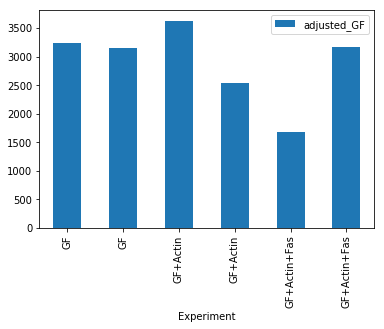

In [327]:
s1.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

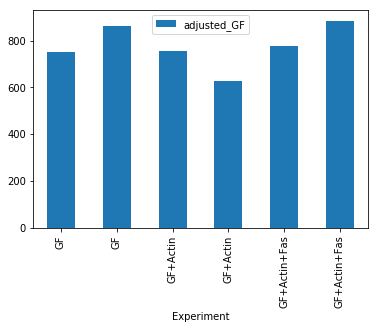

In [328]:
p1.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

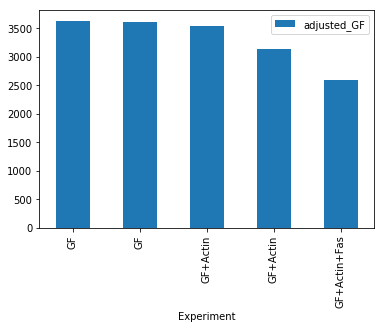

In [329]:
s2.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

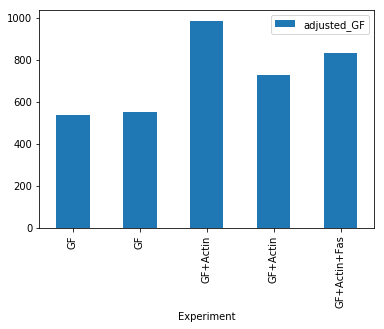

In [330]:
p2.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

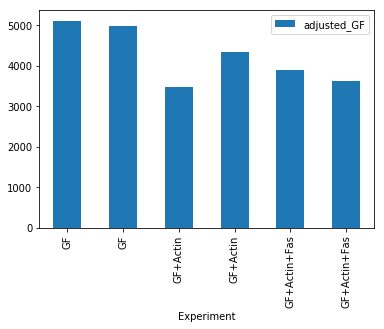

In [331]:
s3.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

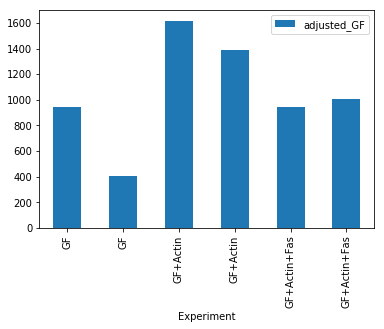

In [332]:
p3.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

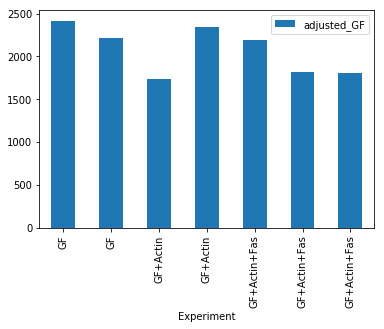

In [333]:
s4.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

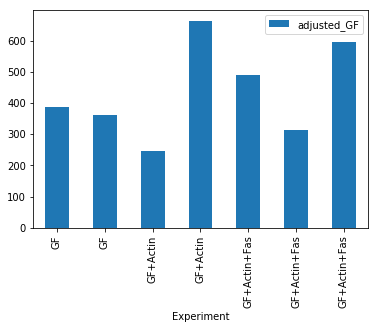

In [334]:
p4.plot(x = 'Experiment', y = 'adjusted_GF', kind = 'bar')

In [335]:
comb_pellet = pd.concat([p1,p2,p3,p4], axis = 0)
comb_sup = pd.concat([s1,s2,s3,s4], axis = 0)

In [336]:
p_means = comb_pellet.groupby('Experiment').agg(np.mean)
p_means.reset_index(inplace = True)
p_se = comb_pellet.groupby('Experiment').agg(stats.sem)
p_se.reset_index(inplace = True)
s_means = comb_sup.groupby('Experiment').agg(np.mean)
s_means.reset_index(inplace = True)
s_se = comb_sup.groupby('Experiment').agg(stats.sem)
s_se.reset_index(inplace = True)

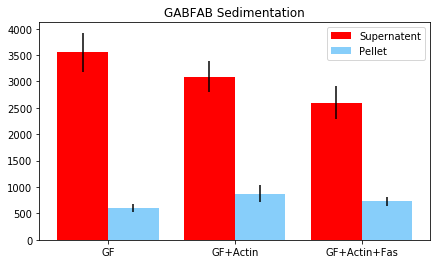

In [337]:
fig, ax = plt.subplots(figsize = (7,4))
ind = np.arange(3)
width = 0.4
p1 = ax.bar(ind, s_means['adjusted_GF'], width, color = 'r', yerr=s_se['adjusted_GF'])
p2 = ax.bar(ind + width, p_means['adjusted_GF'], width, color = 'lightskyblue', yerr = p_se['adjusted_GF'])
ax.set_title('GABFAB Sedimentation')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(s_means['Experiment'])
ax.legend((p1[0], p2[0]), ('Supernatent', 'Pellet'))
plt.savefig('GABFAB_SedGraph_180917_18.png')
plt.show()

In [338]:
from scipy.stats import ttest_ind

In [339]:
s_gf = comb_sup[comb_sup['Experiment'] == 'GF']
s_gf.name = 'sup GF'
s_gfa = comb_sup[comb_sup['Experiment'] == 'GF+Actin']
s_gfa.name = 'sup GF+Actin'
s_gfaf = comb_sup[comb_sup['Experiment'] == 'GF+Actin+Fas']
s_gfaf.name = 'sup GF+Actin+Fas'
p_gf = comb_pellet[comb_sup['Experiment'] == 'GF']
p_gf.name = 'pellet GF'
p_gfa = comb_pellet[comb_sup['Experiment'] == 'GF+Actin']
p_gfa.name = 'pellet GF+Actin'
p_gfaf = comb_pellet[comb_sup['Experiment'] == 'GF+Actin+Fas']
p_gfaf.name = 'pellet GF+Actin+Fas'

In [340]:
sup_data = [s_gf, s_gfa, s_gfaf] 
pellet_data = [p_gf, p_gfa, p_gfaf]
def get_stats(data, col = 'adjusted_GF'):
    stat_data = []
    for table1 in data:
        for table2 in data:
            stat = ttest_ind(table1[col], table2[col], equal_var = False)
            stat_data.append([(table1.name, table2.name, stat)])
            print('{} and {}: {}'.format(table1.name, table2.name, stat))
    return stat_data

In [341]:
sup_stats = get_stats(sup_data)

sup GF and sup GF: Ttest_indResult(statistic=0.0, pvalue=1.0)
sup GF and sup GF+Actin: Ttest_indResult(statistic=0.95181344590938266, pvalue=0.35817606361711363)
sup GF and sup GF+Actin+Fas: Ttest_indResult(statistic=1.9523133600403137, pvalue=0.071956169732578873)
sup GF+Actin and sup GF: Ttest_indResult(statistic=-0.95181344590938266, pvalue=0.35817606361711363)
sup GF+Actin and sup GF+Actin: Ttest_indResult(statistic=0.0, pvalue=1.0)
sup GF+Actin and sup GF+Actin+Fas: Ttest_indResult(statistic=1.1519062812423386, pvalue=0.26868104963530576)
sup GF+Actin+Fas and sup GF: Ttest_indResult(statistic=-1.9523133600403137, pvalue=0.071956169732578873)
sup GF+Actin+Fas and sup GF+Actin: Ttest_indResult(statistic=-1.1519062812423386, pvalue=0.26868104963530576)
sup GF+Actin+Fas and sup GF+Actin+Fas: Ttest_indResult(statistic=0.0, pvalue=1.0)


In [342]:
pellet_stats = get_stats(pellet_data)

pellet GF and pellet GF: Ttest_indResult(statistic=0.0, pvalue=1.0)
pellet GF and pellet GF+Actin: Ttest_indResult(statistic=-1.5765357734121164, pvalue=0.14476021474209777)
pellet GF and pellet GF+Actin+Fas: Ttest_indResult(statistic=-1.1207329540008155, pvalue=0.2813566712716058)
pellet GF+Actin and pellet GF: Ttest_indResult(statistic=1.5765357734121164, pvalue=0.14476021474209777)
pellet GF+Actin and pellet GF+Actin: Ttest_indResult(statistic=0.0, pvalue=1.0)
pellet GF+Actin and pellet GF+Actin+Fas: Ttest_indResult(statistic=0.81498121435948034, pvalue=0.43257691258355524)
pellet GF+Actin+Fas and pellet GF: Ttest_indResult(statistic=1.1207329540008155, pvalue=0.2813566712716058)
pellet GF+Actin+Fas and pellet GF+Actin: Ttest_indResult(statistic=-0.81498121435948034, pvalue=0.43257691258355524)
pellet GF+Actin+Fas and pellet GF+Actin+Fas: Ttest_indResult(statistic=0.0, pvalue=1.0)


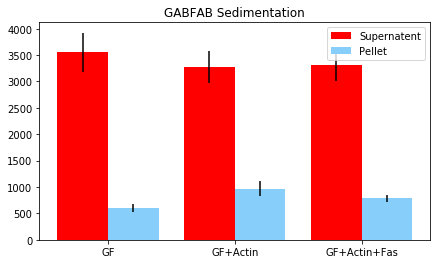

In [343]:
fig, ax = plt.subplots(figsize = (7,4))
ind = np.arange(3)
width = 0.4
p1 = ax.bar(ind, s_means['GF_diff'], width, color = 'r', yerr=s_se['GF_diff'])
p2 = ax.bar(ind + width, p_means['GF_diff'], width, color = 'lightskyblue', yerr = p_se['GF_diff'])
ax.set_title('GABFAB Sedimentation')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(s_means['Experiment'])
ax.legend((p1[0], p2[0]), ('Supernatent', 'Pellet'))
#plt.savefig('GABFAB_SedGraph_180917_18.png')
plt.show()

In [344]:
sup_stats = get_stats(sup_data, col = 'GF_diff')

sup GF and sup GF: Ttest_indResult(statistic=0.0, pvalue=1.0)
sup GF and sup GF+Actin: Ttest_indResult(statistic=0.56246524379318985, pvalue=0.58298546535810347)
sup GF and sup GF+Actin+Fas: Ttest_indResult(statistic=0.4918212610496675, pvalue=0.63080613822841314)
sup GF+Actin and sup GF: Ttest_indResult(statistic=-0.56246524379318985, pvalue=0.58298546535810347)
sup GF+Actin and sup GF+Actin: Ttest_indResult(statistic=0.0, pvalue=1.0)
sup GF+Actin and sup GF+Actin+Fas: Ttest_indResult(statistic=-0.086198277841247936, pvalue=0.93253064451804502)
sup GF+Actin+Fas and sup GF: Ttest_indResult(statistic=-0.4918212610496675, pvalue=0.63080613822841314)
sup GF+Actin+Fas and sup GF+Actin: Ttest_indResult(statistic=0.086198277841247936, pvalue=0.93253064451804502)
sup GF+Actin+Fas and sup GF+Actin+Fas: Ttest_indResult(statistic=0.0, pvalue=1.0)


In [345]:
pellet_stats = get_stats(pellet_data, col = 'GF_diff')

pellet GF and pellet GF: Ttest_indResult(statistic=0.0, pvalue=1.0)
pellet GF and pellet GF+Actin: Ttest_indResult(statistic=-2.2390796252209495, pvalue=0.046936844477346418)
pellet GF and pellet GF+Actin+Fas: Ttest_indResult(statistic=-1.7536506042974922, pvalue=0.1017371758262417)
pellet GF+Actin and pellet GF: Ttest_indResult(statistic=2.2390796252209495, pvalue=0.046936844477346418)
pellet GF+Actin and pellet GF+Actin: Ttest_indResult(statistic=0.0, pvalue=1.0)
pellet GF+Actin and pellet GF+Actin+Fas: Ttest_indResult(statistic=1.1431002443715796, pvalue=0.27934990897569539)
pellet GF+Actin+Fas and pellet GF: Ttest_indResult(statistic=1.7536506042974922, pvalue=0.1017371758262417)
pellet GF+Actin+Fas and pellet GF+Actin: Ttest_indResult(statistic=-1.1431002443715796, pvalue=0.27934990897569539)
pellet GF+Actin+Fas and pellet GF+Actin+Fas: Ttest_indResult(statistic=0.0, pvalue=1.0)
